In [1]:
import matplotlib.pyplot as plt
import numpy as np
from stl import mesh
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits import mplot3d
from math import dist
import pandas as pd
import pyvista as pv
import math

<IPython.core.display.Javascript object>


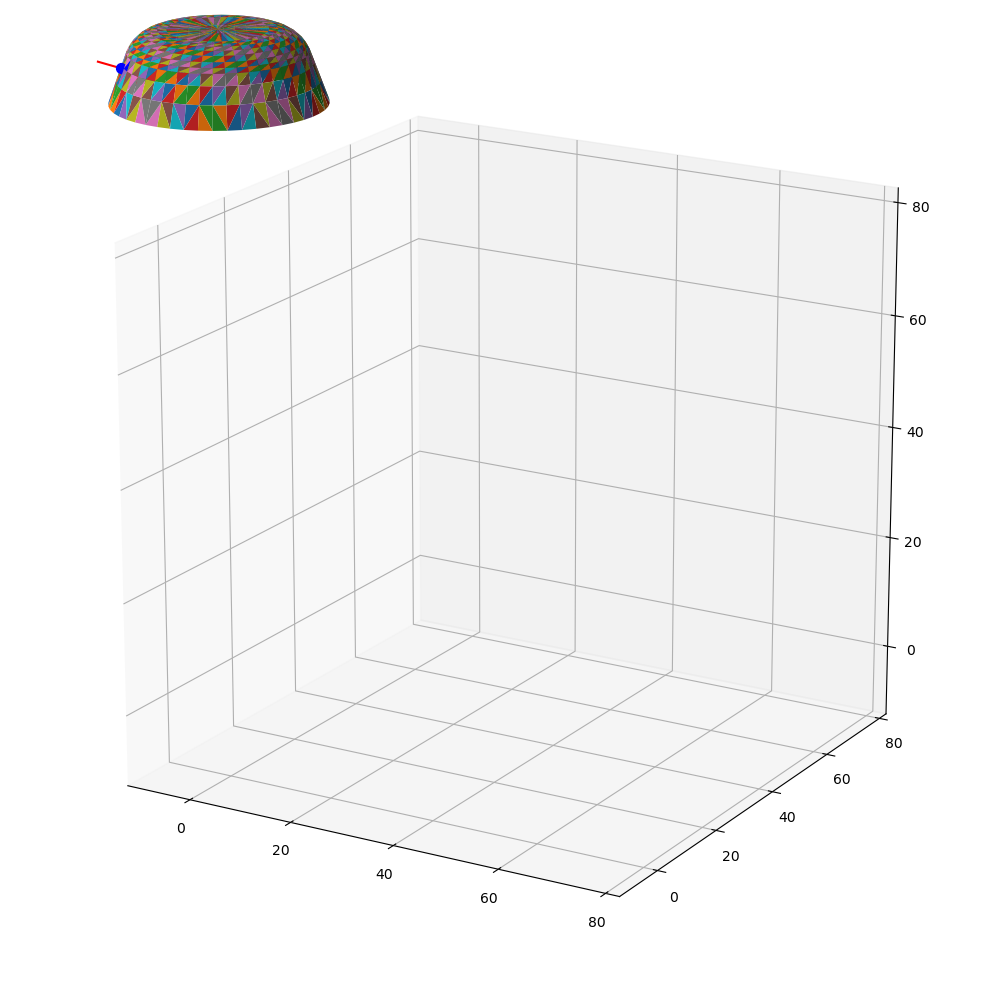

tp_num:  1000
삼각형과 법선벡터의 각도 Degree: 90.0
finish


In [19]:
#load
meshes = mesh.Mesh.from_file(r'D:\Code\Project\LNG\LNG_03\nozzle coating.stl')
weldline=pd.read_csv(r'D:\Code\Project\LNG\LNG_03\Weldline.csv',sep=';')
#weldline=weldline[:]
x_coordinate=weldline['x-coordinate']
y_coordinate=weldline['y-coordinate']
z_coordinate=weldline['z-coordinate']

#figure
%matplotlib notebook
figure = pyplot.figure(figsize=(10,10))
axes = mplot3d.Axes3D(figure)
elements=np.array([])
Vectors=np.array([])

tp_num=1000
print('tp_num: ',tp_num)


#안 형상 1,1264
#바닥 형상 1264,1344
#밖 형상 1344,2448
for i in range(1344,2448):
    
    x0,x1,x2,y0,y1,y2,z0,z1,z2 = meshes.points[i]
    p0 = np.array(list([x0,y0,z0]))
    p1 = np.array(list([x1,y1,z1]))
    p2 = np.array(list([x2,y2,z2]))
    elements=np.append(elements,(p0,p1,p2))
    sur = axes.plot_trisurf(p0,p1,p2)     #삼각형 그리기
    #axes.scatter(p0,p1,p2,c='blue',s=50)   #삼각형 점 그리기
            
#triangle
elements=elements.reshape(-1,9)

#scale
x_tp=x_coordinate*1200
y_tp=y_coordinate*1200
z_tp=z_coordinate*1200
z_tp*=1.4
z_tp+=p2.min()-z_tp.min()

#tool path points
points_tp=np.array([])
for i in range(len(x_coordinate)):
    points_tp=np.append(points_tp,(x_tp[i],y_tp[i],z_tp[i]))
    
points_tp=points_tp.reshape(-1,3)
#axes.scatter(points_tp[:,0:1],points_tp[:,1:2],points_tp[:,2:3],c='red')   #tool path points


tmp_a1=np.array([])
tmp_a2=np.array([])
tmp_a3=np.array([])

for tp_num in range(len(weldline)):
    total_sum=np.array([])
    for i in range(len(elements)):
        tp = points_tp[tp_num]
        p0=elements[i][0:3]
        p1=elements[i][3:6]
        p2=elements[i][6:9]

        a1=np.array([p0[0],p1[0],p2[0]])
        a2=np.array([p0[1],p1[1],p2[1]])
        a3=np.array([p0[2],p1[2],p2[2]])

        len1=dist(a1,tp)
        len2=dist(a2,tp)
        len3=dist(a3,tp)

        sum_tp_points=len1+len2+len3

        total_sum=np.append(total_sum,sum_tp_points)

    #삼각형의 법선 벡터 
    p0=elements[total_sum.argmin()][0:3]
    p1=elements[total_sum.argmin()][3:6]
    p2=elements[total_sum.argmin()][6:9]

    a1=np.array([p0[0],p1[0],p2[0]])
    a2=np.array([p0[1],p1[1],p2[1]])
    a3=np.array([p0[2],p1[2],p2[2]])

    u=a2-a1
    v=a3-a1
    n=np.cross(u,v)
    Vectors=np.append(Vectors,n)

    if tp_num==300:
        tmp_a1=p0
        tmp_a2=p1
        tmp_a3=p2
        
        axes.plot_trisurf(p0,p1,p2,color='blue') #가장 가까운 삼각면
        #axes.scatter(p0,p1,p2,c='blue',s=20) #가장 가까운 삼각형 세점
        axes.scatter(points_tp[tp_num][0],points_tp[tp_num][1],points_tp[tp_num][2],c='blue',s=50) #확인할 TP 포인트 위치
        
        du=dist((u[0], u[1], u[2]),(0,0,0))
        dv=dist((n[0], n[1], n[2]),(0,0,0))
        theta=math.acos(  (np.dot(u,n)) / ( du * dv )   )      
        print('삼각형과 법선벡터의 각도 Degree:',(theta*180)/math.pi)

        axes.plot3D([points_tp[tp_num][0],n[0]+points_tp[tp_num][0]],[points_tp[tp_num][1],n[1]+points_tp[tp_num][1]],[points_tp[tp_num][2],n[2]+points_tp[tp_num][2]],'red')
        
# axes.set_xlim([-25, 25])     
# axes.set_ylim([-25, 25])     
# axes.set_zlim([90, 130])

axes.set_xlim([-50, 120])     
axes.set_ylim([-50, 120])     
axes.set_zlim([-50, 120])
print('finish')

시각화

<IPython.core.display.Javascript object>


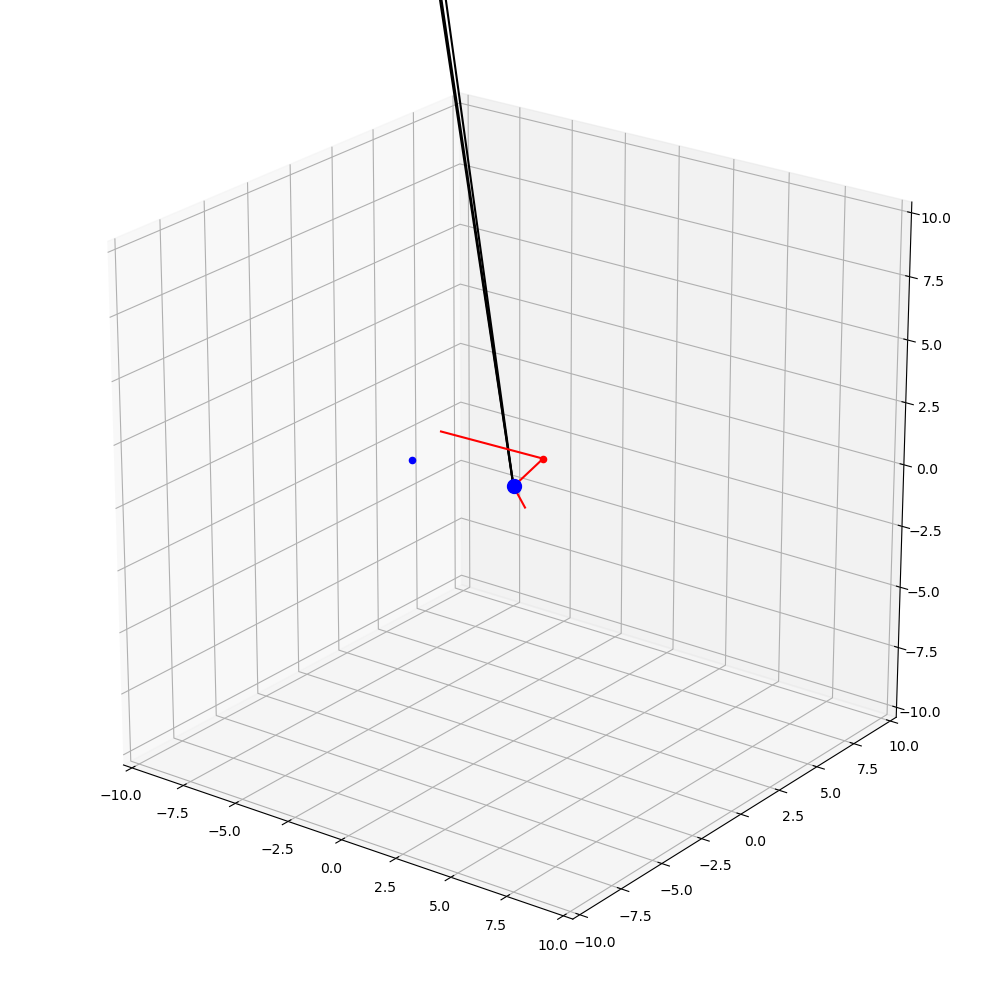

[-2.50229929 -2.85614287  1.39307018]
[ 1.94892979 -0.79811478  1.86442566]
theta: 90.0


(-10.0, 10.0)

In [17]:
import numpy as np
import math
from math import dist

figure = pyplot.figure(figsize=(10,10))
axes = mplot3d.Axes3D(figure)

a=np.array([tmp_a1[0],tmp_a2[0],tmp_a3[0]])
b=np.array([tmp_a1[1],tmp_a2[1],tmp_a3[1]])
c=np.array([tmp_a1[2],tmp_a2[2],tmp_a3[2]])

axes.plot_trisurf( [a[0],b[0],c[0]],[a[1],b[1],c[1]],[a[2],b[2],c[2]]       ,color='blue') #(a,b,c)

axes.scatter(a[0],a[1],a[2],c='red',s=20)
axes.scatter(b[0],b[1],b[2],c='red',s=20)
axes.scatter(c[0],c[1],c[2],c='red',s=20)

axes.plot3D([0,a[0]],[0,a[1]],[0,a[2]],'black')
axes.plot3D([0,b[0]],[0,b[1]],[0,b[2]],'black')
axes.plot3D([0,c[0]],[0,c[1]],[0,c[2]],'black')

v=b-a
u=c-a
axes.plot3D([0,u[0]],[0,u[1]],[0,u[2]],'red')
axes.plot3D([0,v[0]],[0,v[1]],[0,v[2]],'red')


#두직선의 법선 벡터 구하기 (외적)
# n=[(u[1]*v[2]-u[2]*v[1]),(u[2]*v[0]-u[0]*v[2]),(u[0]*v[1]-u[1]*v[0])]
# n=np.cross([v[0],v[1],v[2]]  ,[u[0],u[1],u[2]])  
n=np.cross(v, u) 

print(n)
print(u)
axes.scatter(u[0], u[1], u[2],c='red',s=20)


du=dist((u[0], u[1], u[2]),(0,0,0))
dv=dist((n[0], n[1], n[2]),(0,0,0) )
theta=math.acos(  (np.dot(u,n)) / ( du * dv )   )      
print('theta:',(theta*180)/math.pi)

axes.scatter(0, 0, 0,c='blue',s=100)
axes.scatter(n[0], n[1], n[2],c='blue',s=20)
axes.plot3D([0+u[0],n[0]+u[0]],[0+u[1],n[1]+u[1]],[0+u[2],n[2]+u[2]],'red')

axes.set_xlim([-10, 10])     
axes.set_ylim([-10, 10])     
axes.set_zlim([-10, 10])

법선 벡터 저장

In [11]:
Vectors=Vectors.reshape(-1,3)
weldline=weldline.iloc[:,2:5].values
data = np.concatenate([weldline,Vectors],axis=1)

tp_vector=pd.DataFrame(data,columns=['x-coordinate','y-coordinate','z-coordinate','Vectors_x','Vectors_y','Vectors_z'])
#tp_vector.to_csv("C:/Users/user/Desktop/tp_vector.csv", header='False', index='False')
tp_vector

x-coordinate  y-coordinate  z-coordinate  Vectors_x  Vectors_y  \
0        -0.012973      0.009747      0.103788  -7.508813   5.011916   
1        -0.012743      0.009625      0.103698  -7.508813   5.011916   
2        -0.012476      0.009610      0.103627  -6.790392   5.949138   
3        -0.012209      0.009669      0.103576  -6.790392   5.949138   
4        -0.011953      0.009773      0.103540  -6.790392   5.949138   
...            ...           ...           ...        ...        ...   
1041     -0.000233      0.002090      0.110925   0.000000   0.000000   
1042     -0.000084      0.002297      0.111030   0.000000   0.000000   
1043      0.000051      0.002484      0.111179   0.000000   0.000000   
1044      0.000156      0.002630      0.111387   0.000000   0.000000   
1045      0.000199      0.002689      0.111650   0.000000   0.000000   

      Vectors_z  
0      3.278824  
1      3.278824  
2      3.278829  
3      3.278829  
4      3.278829  
...         ...  
1041   1.049726  
1042   1.049726  
1043   1.049726  
1044   1.049726  
1045   1.049726  

[1046 rows x 6 columns]